In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [72]:
f = lambda x1, x2 : 0.1*x1**2 + 2*x2**2
gradf = lambda x1, x2 : (0.2*x1, 4*x2)

## 1. Gradient Descent

In [33]:
num_epochs, lr = 200, 0.1
w1, w2 = -12, -15
f_x = [(w1, w2)]
## Grad Descent
for epoch in range(num_epochs):
    g1, g2 = gradf(w1, w2)
    w1 -= lr*g1
    w2 -= lr*g2
    f_x.append((w1, w2))

[&lt;matplotlib.lines.Line2D at 0x12dacd08&gt;]

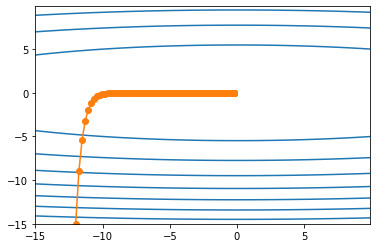

In [34]:
x1, x2 = tf.meshgrid(tf.range(-15, 10.0, 0.1),
                          tf.range(-15.0, 10, 0.1))
plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
plt.plot(*zip(*f_x),  '-o', color='#ff7f0e')

## 2. Momentum

* The more confidence u have on past gradients in one direction -> you take big step. (Asking route analogy)

* At every update we are moving by two steps : grad, momentum

* Momentum is term for having confidence in movement based on past gradients/movements

* $ u_t = \beta^{t-1}*lr*g_1 + \beta^{t-2}*lr*g_2 + .. + \beta^{t-t}*lr*g_t $


In [40]:
w1, w2 = -15, -12 # Initial Value
u1, u2 = 0, 0  # Updates
f_x = [(w1, w2)]
for epoch in range(num_epochs):
    g1, g2 = gradf(w1, w2)

    u1 = 0.9*u1 + lr*g1 
    u2 = 0.9*u2 + lr*g2

    w1 -= u1
    w2 -= u2
    
    f_x.append((w1, w2))

[&lt;matplotlib.lines.Line2D at 0x15a9db48&gt;]

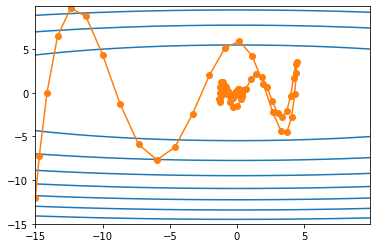

In [41]:
x1, x2 = tf.meshgrid(tf.range(-15, 10.0, 0.1),
                          tf.range(-15.0, 10, 0.1))
plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
plt.plot(*zip(*f_x),  '-o', color='#ff7f0e')

## 3. Nesterov Adaptive Grad Descent

* Instead of moving two steps for one update, you take one step and if take cautious second step
* Lookahead Update : Based on momentum
* Gradient Update : Based on Lookahead position and not at w_t position

In [42]:
w1, w2 = -15, -12 # Initial Value
u1, u2 = 0, 0  # Updates
f_x = [(w1, w2)]
for epoch in range(num_epochs):
    w_lookahead_g1 = w1 - 0.9*u1  # Lookahead with momentum
    w_lookahead_g2 = w2 - 0.9*u2  # Lookahead with momentum
 
    g1, g2 = gradf(w_lookahead_g1, w_lookahead_g2)

    u1 = 0.9*u1 + lr*g1   # Gradient Update at that location (if grad is -, you pull back by that step)
    u2 = 0.9*u2 + lr*g2
    
    w1 -= u1
    w2 -= u2
    f_x.append((w1, w2))

[&lt;matplotlib.lines.Line2D at 0x15e44cc8&gt;]

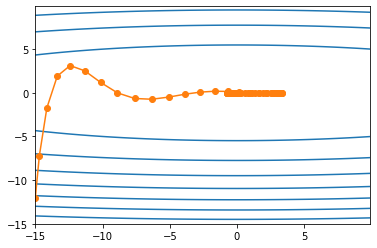

In [43]:
x1, x2 = tf.meshgrid(tf.range(-15, 10.0, 0.1),
                          tf.range(-15.0, 10, 0.1))
plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
plt.plot(*zip(*f_x),  '-o', color='#ff7f0e')

### 4. Ada Grad

* Considerate for cases with different scales of dimensions or adapt learning rate wrt to the amount of updates recieved

* The grad update is moving rather towards optimal direction, but the decay is very aggresive and hence vanishes!

In [53]:
w1, w2 = -15, -12 # Initial Value
u1, u2 = 0, 0  # Updates
f_x = [(w1, w2)]
for epoch in range(200):
    g1, g2 = gradf(w1, w2)

    u1 = u1 + g1**2
    u2 = u2 + g2**2

    w1 -= lr/(np.sqrt(u1) + 1e-6)*g1
    w2 -= lr/(np.sqrt(u2) + 1e-6)*g2

    f_x.append((w1, w2))

[&lt;matplotlib.lines.Line2D at 0x15e8f648&gt;]

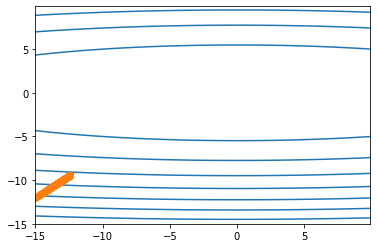

In [54]:
x1, x2 = tf.meshgrid(tf.range(-15, 10.0, 0.1),
                          tf.range(-15.0, 10, 0.1))
plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
plt.plot(*zip(*f_x),  '-o', color='#ff7f0e')

### 5. RMS Prop

* Avoids aggressive learning rate decay by considering weighted average of updates


In [59]:
w1, w2 = -15, -12 # Initial Value
u1, u2 = 0, 0  # Updates
f_x = [(w1, w2)]
for epoch in range(200):
    g1, g2 = gradf(w1, w2)

    u1 = 0.9*u1 + (1- 0.9)*g1**2
    u2 = 0.9*u2 + (1- 0.9)*g2**2

    w1 -= lr/(np.sqrt(u1) + 1e-6)*g1
    w2 -= lr/(np.sqrt(u2) + 1e-6)*g2

    f_x.append((w1, w2))

[&lt;matplotlib.lines.Line2D at 0x1837c288&gt;]

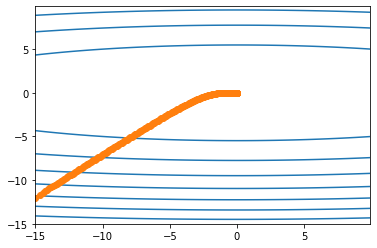

In [60]:
x1, x2 = tf.meshgrid(tf.range(-15, 10.0, 0.1),
                          tf.range(-15.0, 10, 0.1))
plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
plt.plot(*zip(*f_x),  '-o', color='#ff7f0e')

### 6. Adam

* Adding momentum to this udpates yields better convergence

In [62]:
w1, w2 = -15, -12 # Initial Value
u1, u2 = 0, 0  # Updates
m1, m2 = 0, 0  # Updates
f_x = [(w1, w2)]
for epoch in range(200):
    g1, g2 = gradf(w1, w2)

    m1 = 0.9*m1 + (1- 0.9)*g1
    m2 = 0.9*m2 + (1- 0.9)*g2

    u1 = 0.9*u1 + (1- 0.9)*g1**2
    u2 = 0.9*u2 + (1- 0.9)*g2**2

    w1 -= lr/(np.sqrt(u1) + 1e-6)*m1
    w2 -= lr/(np.sqrt(u2) + 1e-6)*m2

    f_x.append((w1, w2))

[&lt;matplotlib.lines.Line2D at 0x18447588&gt;]

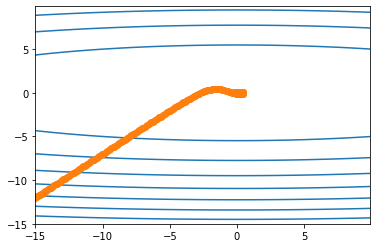

In [63]:
x1, x2 = tf.meshgrid(tf.range(-15, 10.0, 0.1),
                          tf.range(-15.0, 10, 0.1))
plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
plt.plot(*zip(*f_x),  '-o', color='#ff7f0e')